In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import shap
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [2]:
df= pd.read_csv("Airline_passenger_satisfaction.csv")
print("Combined dataset shape:", df.shape)
df.head()

Combined dataset shape: (129880, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df = df.loc[:, ~df.columns.str.contains('^unnamed', case=False)]

In [4]:
df.columns = (df.columns
              .str.lower()
              .str.strip()
              .str.replace(' ', '_')
              .str.replace('/', '_')
              .str.replace('-', '_'))
print(df.columns.tolist())

['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class', 'flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'satisfaction']


EDA

In [6]:
print("shape:",df.shape)
print(df.columns)
display(df.head())
display(df['satisfaction'].value_counts(normalize=True))

shape: (129880, 24)
Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')


,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


satisfaction
neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: proportion, dtype: float64

In [7]:
print(df.isna().sum())
display(df.describe(include='all'))

id                                     0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on_board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64


,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,129880.000000,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880
unique,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73452
mean,64940.500000,NaN,NaN,39.427957,NaN,NaN,1190.316392,2.728696,3.057599,2.756876,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,NaN
std,37493.270818,NaN,NaN,15.119360,NaN,NaN,997.452477,1.329340,1.526741,1.401740,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,NaN
min,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,32470.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,64940.500000,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,97410.250000,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [8]:
df.columns = [c.strip() for c in df.columns]

In [9]:
cat_cols = [
    'gender','customer_type','type_of_travel','class'
]

In [10]:
rating_cols = [
 'inflight_wifi_service','departure_arrival_time_convenient','ease_of_online_booking',
 'gate_location','food_and_drink','online_boarding','seat_comfort',
 'inflight_entertainment','on_board_service','leg_room_service','baggage_handling',
 'checkin_service','cleanliness'
]

In [11]:
num_cols = ['age','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes']

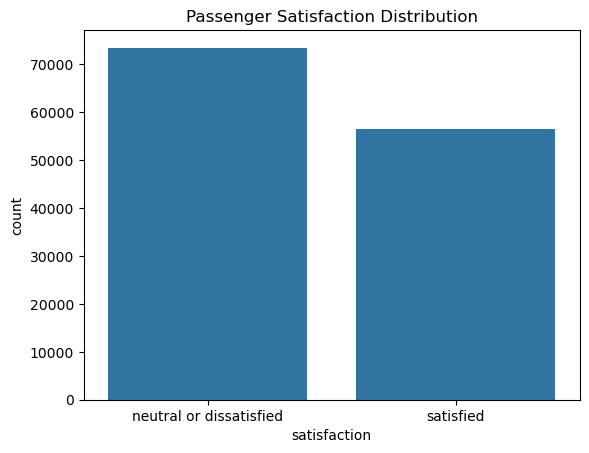

In [12]:
sns.countplot(data=df, x='satisfaction')
plt.title('Passenger Satisfaction Distribution')
plt.show()


satisfaction,neutral or dissatisfied,satisfied
seat_comfort,,
0,1.000000,0.000000
1,0.776675,0.223325
2,0.773976,0.226024
3,0.785922,0.214078
4,0.439707,0.560293
5,0.348664,0.651336


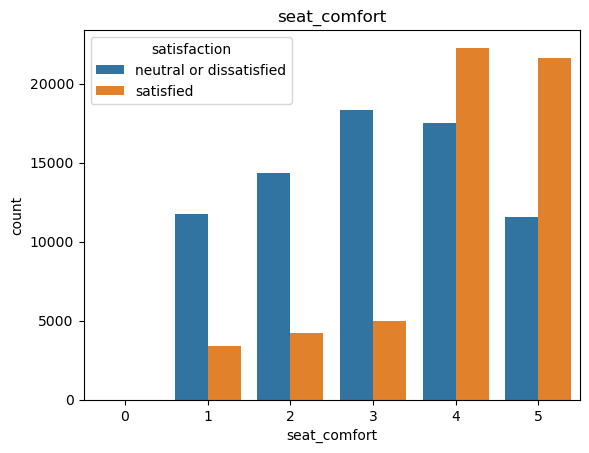

satisfaction,neutral or dissatisfied,satisfied
food_and_drink,,
0,0.583333,0.416667
1,0.800449,0.199551
2,0.611000,0.389000
3,0.602576,0.397424
4,0.474168,0.525832
5,0.449118,0.550882


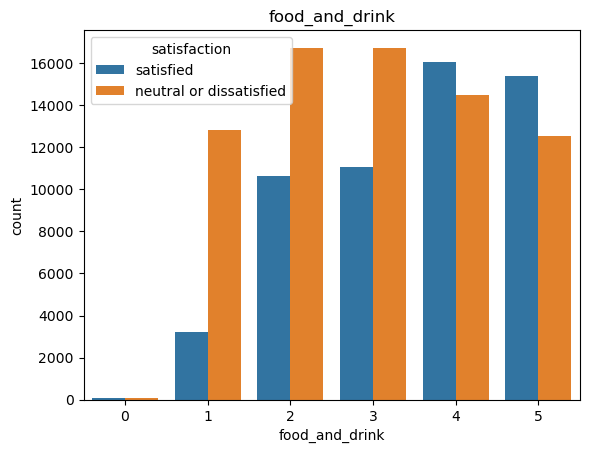

satisfaction,neutral or dissatisfied,satisfied
inflight_wifi_service,,
0,0.002554,0.997446
1,0.671802,0.328198
2,0.752785,0.247215
3,0.748175,0.251825
4,0.399233,0.600767
5,0.009822,0.990178


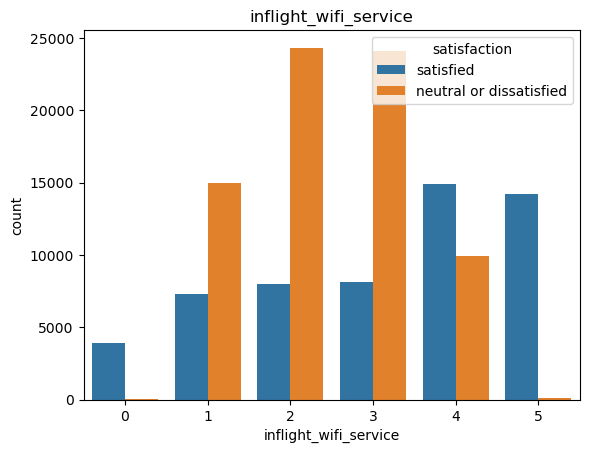

satisfaction,neutral or dissatisfied,satisfied
leg_room_service,,
0,0.655518,0.344482
1,0.795890,0.204110
2,0.724735,0.275265
3,0.723938,0.276062
4,0.416904,0.583096
5,0.385439,0.614561


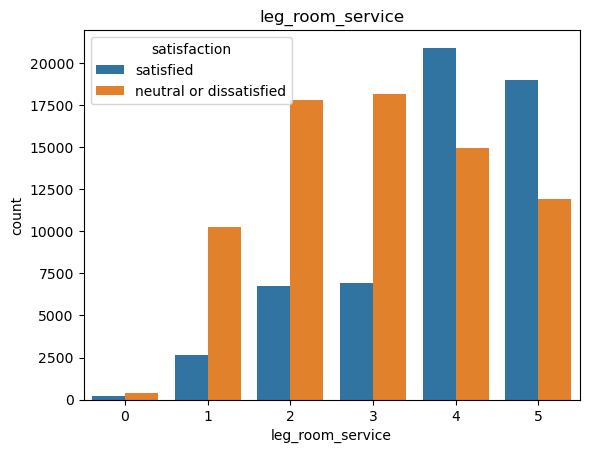

satisfaction,neutral or dissatisfied,satisfied
online_boarding,,
0,0.435390,0.564610
1,0.862228,0.137772
2,0.885475,0.114525
3,0.862374,0.137626
4,0.376989,0.623011
5,0.129439,0.870561


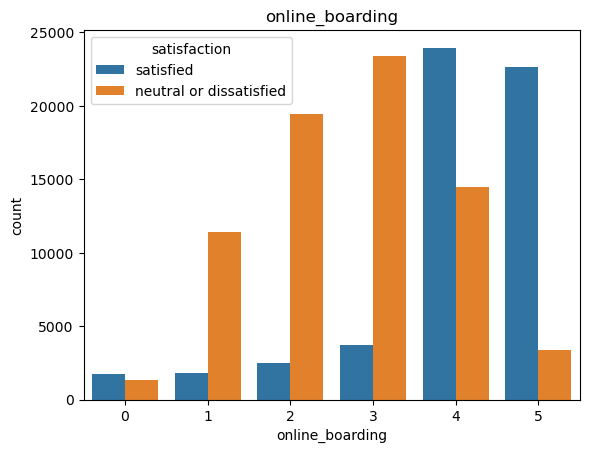

In [13]:
import matplotlib.pyplot as plt
for col in ['seat_comfort','food_and_drink','inflight_wifi_service','leg_room_service','online_boarding']:
    if col in df.columns:
        display(pd.crosstab(df[col], df['satisfaction'], normalize='index'))
        sns.countplot(data=df, x=col, hue='satisfaction')
        plt.title(col)
        plt.show()

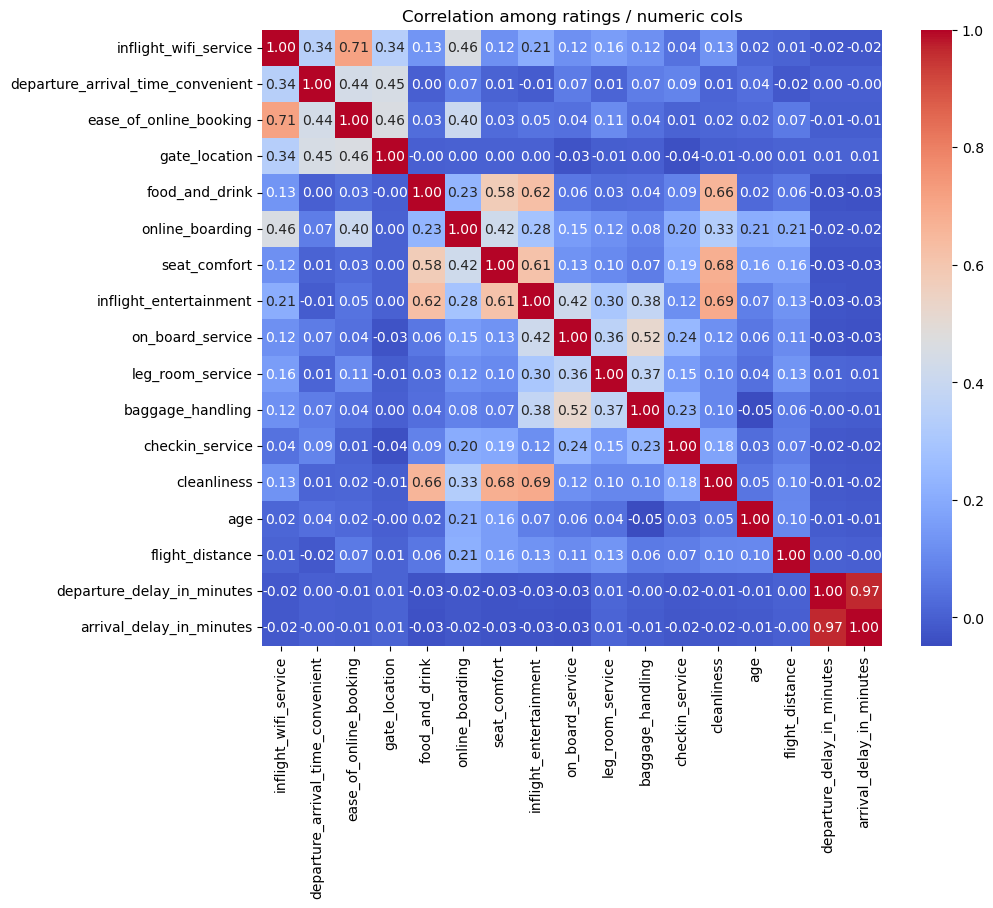

In [14]:
corr_df= df[rating_cols + num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation among ratings / numeric cols")
plt.show()

In [15]:
#ENCODE CATEGORICAL FEATURES
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [16]:
#SPLIT DATA
X = df_encoded.drop('satisfaction', axis=1)
y = df_encoded['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#TRAIN MODEL
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model Accuracy:", model.score(X_test, y_test))

Model Accuracy: 0.9636202648598706


In [18]:
#SHAP ANALYSIS
explainer = shap.Explainer(model,X_train,feature_perturbation="interventional")
shap_values = explainer(X_test[:1000])

100%|===================| 1994/2000 [04:44<00:00]        

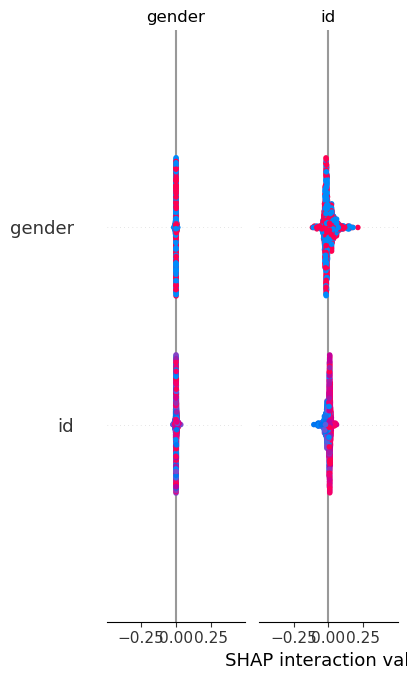

In [19]:
shap.summary_plot(shap_values,X_test[:1000])

In [21]:
!pip install dash

^C


   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.9 MB 752.3 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/7.9 MB 752.3 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/7.9 MB 705.9 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/7.9 MB 705.9 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/7.9 MB 705.9 kB/s eta 0:00:11
   ----- ---------------------------------- 1.0/7.9 MB 519.3 kB/s eta 0:00:14
   ----- ---------------------------------- 1.0/7.9 MB 519.3 kB/s eta 0:00:14
   ----- ---------------------------------- 1.0/7.9 MB 519.3 kB/s eta 0:00:14
   ------ --------------------------------- 1.3/7.9 MB 470.2 kB/s eta 0:00:15
   ------ ------------

In [22]:
import dash
from dash import dcc, html
import plotly.express as px

In [24]:
satisfaction_counts = df['satisfaction'].value_counts().reset_index()
satisfaction_counts.columns = ['satisfaction', 'count']  # Rename columns for clarity

fig = px.bar(
    satisfaction_counts,
    x='satisfaction',
    y='count',
    title='Satisfaction Distribution'
)
fig.show()

In [26]:
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Airline Passenger Satisfaction Dashboard"),
    dcc.Graph(figure=fig),
    html.P("Explore satisfaction trends and service ratings.")
])

if __name__ == '__main__':
    app.run(debug=True)